# look into https://seaborn.pydata.org/tutorial/aesthetics.html

{% include toc title="In This Lesson" icon="file-text" %}

In this data lesson, we explore and visualize stream discharge time series
data collected by the United States Geological Survey (USGS). You will use everything
that you learned in the previous lessons to create your plots. You will use these
plots in the report that you submit for your homework.

Note: this page just shows you what the plots should look like. You will need
to use your programming skills to create the plots!

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Plot USGS Stream Discharge time series data in `Python`.

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need

You need `Python` and `Jupyter notebooks` to complete this tutorial. Also you should have
an `earth-analytics` directory setup on your computer with a `/data`
directory with it.

* [How to Setup R / RStudio](/course-materials/earth-analytics/week-1/setup-r-rstudio/)
* [Setup your working directory](/course-materials/earth-analytics/week-1/setup-working-directory/)
* [Intro to the R & RStudio Interface](/course-materials/earth-analytics/week-1/intro-to-r-and-rstudio)

Please download the data (used throughout this series of lessons) if you don't already have it on your computer.

[<i class="fa fa-download" aria-hidden="true"></i> Download Week 2 Data](https://ndownloader.figshare.com/files/7426738){:data-proofer-ignore='' .btn }

</div>

## About the Data - USGS Stream Discharge Data

The USGS has a distributed network of aquatic sensors located in streams across
the United States. This network monitors a suit of variables that are important
to stream morphology and health. One of the metrics that this sensor network
monitors is **Stream Discharge**, a metric which quantifies the volume of water
moving down a stream. Discharge is an ideal metric to quantify flow, which
increases significantly during a flood event.

> As defined by USGS: Discharge is the volume of water moving down a stream or
> river per unit of time, commonly expressed in cubic feet per second or gallons
> per day. In general, river discharge is computed by multiplying the area of
> water in a channel cross section by the average velocity of the water in that
> cross section.
>
> <a href="http://water.usgs.gov/edu/streamflow2.html" target="_blank">
Read more about stream discharge data collected by USGS.</a>

<figure>
<a href="{{ site.url }}/images/course-materials/earth-analytics/week-2/USGS-peak-discharge.gif">
<img src="{{ site.url }}/images/course-materials/earth-analytics/week-2/USGS-peak-discharge.gif" alt="Plot of stream discharge from the USGS boulder creek stream gage"></a>
<figcaption>
The USGS tracks stream discharge through time at locations across the United
States. Note the pattern observed in the plot above. The peak recorded discharge
value in 2013 was significantly larger than what was observed in other years.
Source: <a href="http://nwis.waterdata.usgs.gov/usa/nwis/peak/?site_no=06730200" target="_blank"> USGS, National Water Information System. </a>
</figcaption>
</figure>



## Work with USGS Stream Gage Data

Let's begin by loading the required libraries and setting our working directory.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.ion()
# set working directory -- can i set this as a hidden line of code and then have my usual teaser commented out set your wd line??
os.chdir("/Users/lewa8222/Documents/earth-analytics/")

plt.style.use('seaborn-white')

##  Import USGS Stream Discharge Data Into Python

Let's first import our data using the pandas `read.csv()` function.


In [22]:
discharge = pd.read_csv('data/week2/discharge/06730200-discharge-daily-1986-2013.csv', 
                        parse_dates=['datetime'])
discharge.head()

,agency_cd,site_no,datetime,disValue,qualCode
0,USGS,6730200,1986-10-01,30.0,A
1,USGS,6730200,1986-10-02,30.0,A
2,USGS,6730200,1986-10-03,30.0,A
3,USGS,6730200,1986-10-04,30.0,A
4,USGS,6730200,1986-10-05,30.0,A


In [23]:
discharge.dtypes

agency_cd            object
site_no               int64
datetime     datetime64[ns]
disValue            float64
qualCode             object
dtype: object

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge

Now that the data are imported, plot disValue (discharge value) over time.
To do this, you will need to use
everything that you learned in the previous lessons.

Hint: when converting the date, take a close look at the format of the date -
is the year 4 digits (including the century) or just 2? Use `?XXXstrptime` to figure
out what format elements you'll need to include to get the date right.
</div>



In [24]:
# i'm guessing you don't have to do this step?
# discharge['datetime'] = pd.to_datetime(discharge['datetime'])





Your plot should look something like the one below:




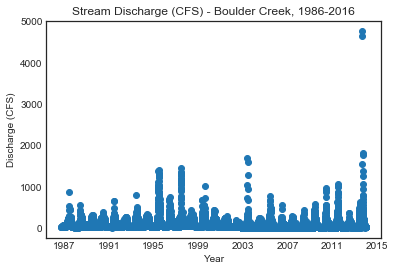

In [25]:
# this is a challenge so this should be hidden.  
fig, ax = plt.subplots()
ax.plot('datetime', 'disValue', 'o', data=discharge)
ax.set(title="Stream Discharge (CFS) - Boulder Creek, 1986-2016",
       xlabel="Year", ylabel="Discharge (CFS)");

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge

Similar to the previous lesson, take the cleaned discharge data that you just
plotted and subset it to the time span
of **2013-08-15 to 2013-10-15**.  

Finally plot the data using `matplotlib`. Your plot should look like the one below.
</div>


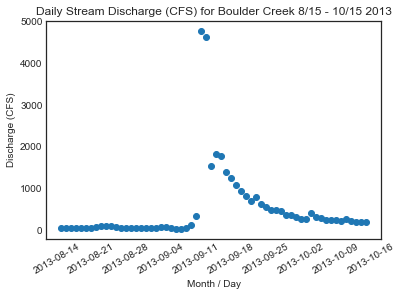

In [26]:
# Subset the data using regulary bollean approach 
discharge_augSept_2013 = discharge[(discharge['datetime'] >= "2013-08-15") & 
                                   (discharge['datetime'] <= "2013-10-15")]
# plot the data 
# again i think that we need to hide this cdoe...
fig, ax = plt.subplots()
ax.plot('datetime', 'disValue', 'o', 
        data=discharge_augSept_2013)
ax.set(title="Daily Stream Discharge (CFS) for Boulder Creek 8/15 - 10/15 2013",
       xlabel="Month / Day", ylabel="Discharge (CFS)")
plt.setp(ax.get_xticklabels(), rotation=30);